# Descriptive summary: Experiment results

> 

> 



In this notebook we test and provide the scores and illustrations for our Multi-class experiments followed by our generalisability experiments. These are outlined as:
                            

1.   Multi-class experiments

  *   Train and test Real-RF on X_test: 
      Here we train a random forest on a real CICIDS2017
      training sample, then test this same model on a 
      test sample obtained from the same dataset.

  *   Train and test Multi-cGAN-RF on X_test: 
      Here we train a random forest on our generated 
      data obtained from our multi-class model found in /RESEARCH-PROJECT/Multi_class_experiments/models/Multi-cGAN-RF-CICIDS2017.ipynb

2.   Generalisability experiments 

  *   Test the performance of Real-RF on CICIDS2018 data: 
      Here we train a random forest on a real CICIDS2017
      training sample, then test this same model on a 
      test sample obtained from CICIDS2018.
  *   Compare performance of Real-RF to combined data: 
      Here we compare the results of the previous experiment against result obtained from a random forest trained on a mixture real CICIDS2017 and generated data based on the same CICIDS2017 sample. This random forest model is then tested on a CICIDS2018 test sample.
  *   Compare performance of Real-RF to only generated data: Comparing the results gained from Real-RF to results gained from Multi-cGAN-RF when tested on CICIDS2018. *As opposed to combining the real and generated data.
  *   Comparison of all three datasets



# Import relevant libraries

In [ ]:
!pip install scikit-plot
# modules for importing and manipulating data
import numpy as np 
import pandas as pd 

# modules for visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt 
import scikitplot as skplt
import seaborn as sns


# modules for data transformation, sampling and modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# module for scoring and evaluating performance
from sklearn.metrics import f1_score,classification_report


# Import data from drive

In [ ]:
# mount drive 
from google.colab import drive
drive.mount('/content/drive')

# import data from drive 
df2017 = pd.read_parquet('/content/drive/MyDrive/RESEARCH-PROJECT/Multi_class_experiments/Datasets/prepared201710k.PARQUET', engine='auto')#Prepared CICIDS2017 sample
df_gan=pd.read_parquet("/content/drive/MyDrive/RESEARCH-PROJECT/Multi_class_experiments/Datasets/generated_data_epoch_130.PARQUET")#Generated dataset
df2018=pd.read_parquet("/content/drive/MyDrive/RESEARCH-PROJECT/Multi_class_experiments/Datasets/2018_balanced_test_sample.PARQUET")#CICIDS2018 testing sample

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data preparation 



In [ ]:
X = df2017.drop(["attack_map"], axis=1) 
y = df2017['attack_map']

In [ ]:
# use SMOTE to increase Bot and Bruteforce to 10k
sampler = {0:10000,1:10000,2:10000,3:10000,4:10000}
oversample = SMOTE(sampling_strategy=sampler, random_state=42)
X, y = oversample.fit_resample(X, y)

In [ ]:
# train, test split (75/25)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42,stratify=y
)

In [ ]:
# Scale all features to be between 0-1 this is to ensure all features are view with equal importance by the algorithm
scaler = StandardScaler()

# Make sure to only fit the scaler on the training data
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_train.columns] = scaler.transform(X_test[X_train.columns])

## Functions for plotting results

In [ ]:
def plotdata(data,title,x,y,label,hue=None,palette=sns.color_palette(['blue', 'grey'])):
    g=sns.catplot(data=data, kind="bar", x=x, y=y, hue=hue,size=6,palette=palette)
    # sns.move_legend(g, "upper right")
    plt.title(f'{title}', loc='center', pad=40,fontsize = 15)
    g.set_ylabels("F1 score", x=1,fontsize = 12,labelpad=20,weight='bold')
    g.set_xlabels(label,y=1 ,fontsize = 12,labelpad=20,weight='bold')

    for ax in g.axes.ravel():
        for p in ax.patches:
            percentage = f'{int(p.get_height())}%\n'
            ax.annotate(format(f'{percentage}'), (p.get_x() + p.get_width() / 2.,
                p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points',
                )


# Multi class expirment



### Train and test Real-RF on X_test


In [ ]:
real_rf= RandomForestClassifier(max_depth=8, n_estimators=100)
real_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8)

In [ ]:
rrfp=real_rf.predict(X_test)
f1_score(y_test, rrfp ,average='micro')

0.98835

In [ ]:
print(classification_report(y_test, rrfp))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      4000
           1       1.00      1.00      1.00      4000
           2       0.97      1.00      0.98      4000
           3       0.99      0.99      0.99      4000
           4       1.00      1.00      1.00      4000

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000



In [ ]:
# store F1 results in df
dict1={"Attack type":["Brute force","Bot","DoS","DDoS","Benign"],"Model":["Real-RF","Real-RF","Real-RF","Real-RF","Real-RF"],"F1 score":[97,100,98,99,100]}
real=pd.DataFrame(dict1)

### Train and test Multi-cGAN-RF on X_test


In [ ]:
# split gans data into x and y 
X_gan = df_gan.drop(["attack_map"], axis=1) 
y_gan = df_gan['attack_map']

In [ ]:
multi_cgan_rf= RandomForestClassifier(max_depth=10, n_estimators=100,random_state=42)
multi_cgan_rf.fit(X_gan,y_gan)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
# mrfp=multi_cgan_rf.predict(X_test)
f1_score(y_test, mrfp ,average='micro')

0.7819

In [ ]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_test, mrfp ,average='macro')

0.8083563649949113

In [ ]:
recall_score(y_test, mrfp ,average='macro')

0.7819

In [ ]:
print(classification_report(y_test, mrfp))

              precision    recall  f1-score   support

           0       0.84      0.55      0.66      4000
           1       0.84      0.76      0.80      4000
           2       0.74      0.85      0.79      4000
           3       1.00      0.84      0.91      4000
           4       0.63      0.91      0.75      4000

    accuracy                           0.78     20000
   macro avg       0.81      0.78      0.78     20000
weighted avg       0.81      0.78      0.78     20000



In [ ]:
# store F1 results in df
dict2={"Attack type":["Brute force","Bot","DoS","DDoS","Benign"],"Model":["multi-cGAN-RF","multi-cGAN-RF","multi-cGAN-RF","multi-cGAN-RF","multi-cGAN-RF"],"F1 score":[80,79,91,75,66]}
mgan=pd.DataFrame(dict2)

In [ ]:
# combine frames
multi=mgan.append(real)
multi.sort_values(by=['Attack type'],ascending=False,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


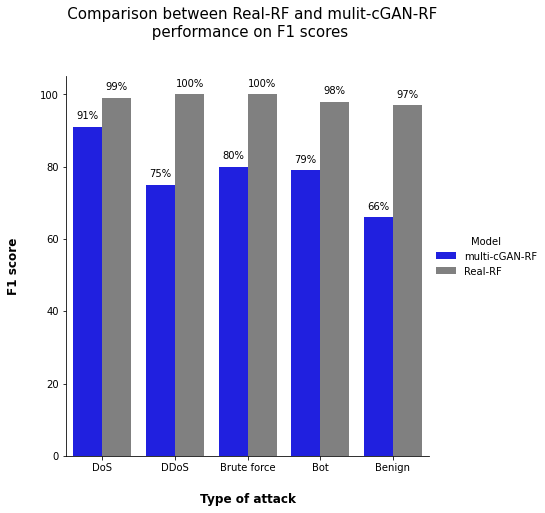

In [ ]:

plotdata(multi,"   Comparison between Real-RF and mulit-cGAN-RF \n performance on F1 scores",  "Attack type","F1 score" , "Type of attack",hue="Model",palette=sns.color_palette(['blue', 'grey']) )
# plotdata(data,title,x,y,hue=None)

# Generalisability experiment

### Test the performance of Real-RF on 2018 data 

In [ ]:
# split 2018 data into x,y 
# split gans data into x and y 
X18 = df2018.drop(["attack_map","Label","Protocol","Timestamp"], axis=1) 
y18 = df2018['attack_map']

In [ ]:
# scale tranform X_18
X18[X_train.columns] = scaler.transform(X18[X_train.columns])

In [ ]:
rrf18=real_rf.predict(X18)
f1_score(y18, rrf18,average='micro')

0.4437907068057529

In [ ]:
print(classification_report(y18, rrf18))

              precision    recall  f1-score   support

           0       0.30      0.95      0.46    100000
           1       0.90      0.00      0.01     94082
           2       1.00      0.00      0.01    100000
           3       0.58      0.73      0.64    100000
           4       1.00      0.50      0.67    100000

    accuracy                           0.44    494082
   macro avg       0.76      0.44      0.36    494082
weighted avg       0.75      0.44      0.36    494082



In [ ]:
dict3={"Attack type":["Benign","Brute force","Bot","DoS","DDoS"],"Training data":["Real","Real","Real","Real","Real"],"F1 score":[46,1,1,64,67]}
realf1=pd.DataFrame(dict3)

### Compare performance of Real-RF to combined data

In [ ]:
combix = pd.concat([X_gan,X_train], ignore_index=True, sort=False)
combiy = pd.concat([y_gan,y_train], ignore_index=True, sort=False)

In [ ]:
combi_rf= RandomForestClassifier(max_depth=8, n_estimators=100,random_state=42)
combi_rf.fit(combix,combiy)

RandomForestClassifier(max_depth=8, random_state=42)

In [ ]:
combi18=combi_rf.predict(X18)
f1_score(y18, combi18,average='micro')

0.5882869645119636

In [ ]:
print(classification_report(y18, combi18))

              precision    recall  f1-score   support

           0       0.32      0.90      0.47    100000
           1       0.00      0.00      0.00     94082
           2       1.00      0.96      0.98    100000
           3       1.00      0.55      0.71    100000
           4       0.84      0.49      0.62    100000

    accuracy                           0.59    494082
   macro avg       0.63      0.58      0.56    494082
weighted avg       0.64      0.59      0.56    494082



In [ ]:
# store F1 results in df
dict4={"Attack type":["Benign","Brute force","Bot","DoS","DDoS"],"Training data":["Combined","Combined","Combined","Combined","Combined"],"F1 score":[47,0,98,71,62]}
combinedf1=pd.DataFrame(dict4)

In [ ]:
# combine results 
gen=combinedf1.append(realf1)
gen.sort_values(by=['Attack type'],ascending=False,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


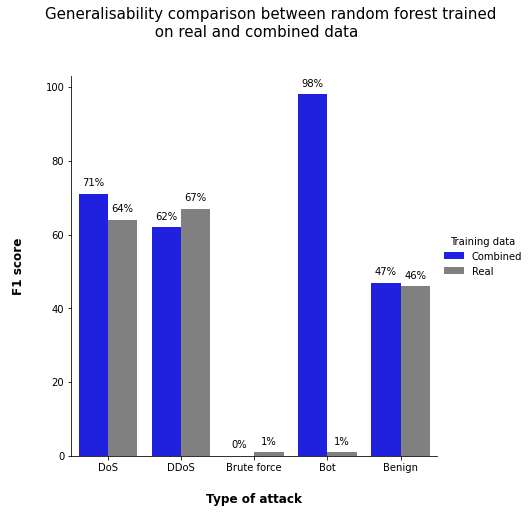

In [ ]:
plotdata(gen,"        Generalisability comparison between random forest trained \n on real and combined data","Attack type","F1 score" , "Type of attack","Training data")

### Compare performance of Real-RF to only generated data

In [ ]:
mc2018=multi_cgan_rf.predict(X18)
f1_score(y18, mc2018 ,average='micro')

0.7174800943972863

In [ ]:
print(classification_report(y18, mc2018))

              precision    recall  f1-score   support

           0       0.87      0.57      0.69    100000
           1       0.82      1.00      0.90     94082
           2       0.78      1.00      0.88    100000
           3       0.99      0.04      0.09    100000
           4       0.55      1.00      0.71    100000

    accuracy                           0.72    494082
   macro avg       0.80      0.72      0.65    494082
weighted avg       0.80      0.72      0.65    494082



In [ ]:
# store F1 results in df
dict5={"Attack type":["Benign","Brute force","Bot","DoS","DDoS"],"Training data":["Generated","Generated","Generated","Generated","Generated"],"F1 score":[69,90,88,0.9,71]}
generatedf1=pd.DataFrame(dict5)

In [ ]:
# combine results 
gen2=generatedf1.append(realf1)
gen2.sort_values(by=['Attack type'],ascending=False,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


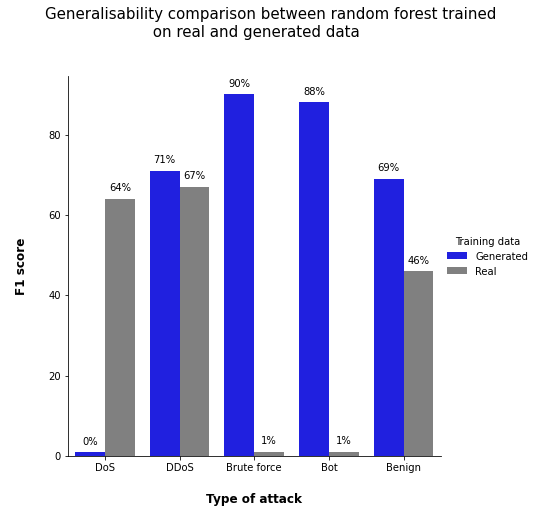

In [ ]:
plotdata(gen2,"        Generalisability comparison between random forest trained \n on real and generated data","Attack type","F1 score" , "Type of attack", "Training data")

### Compare all three training data sets 

In [ ]:
np.round(f1_score(y18, rrf18,average='micro'),2)

0.44

In [ ]:
np.round(f1_score(y18, combi18,average='micro'),2)

0.59

In [ ]:
np.round(f1_score(y18, mc2018 ,average='micro'),2)

0.72

In [ ]:
# store F1 results in df
dict6={"Training data":["Real","Combined","Generated"],"Average F1 score":[44,59,72]}
averagef1=pd.DataFrame(dict6)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


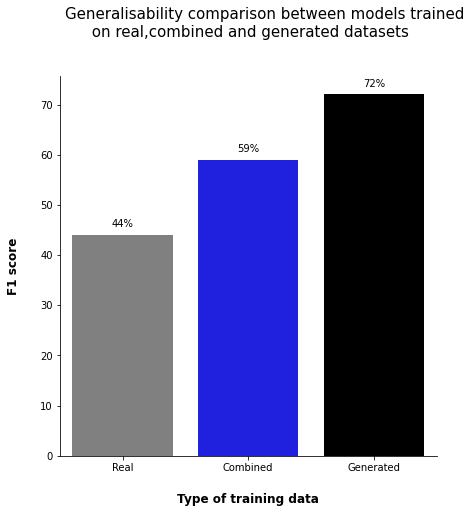

In [ ]:

plotdata(averagef1,"        Generalisability comparison between models trained \n on real,combined and generated datasets","Training data","Average F1 score", "Type of training data",hue=None,palette=sns.color_palette(['grey','blue','black']))

# sns.barplot(data=averagef1,x="Training data",y="F1 score")

#save training data to file 

In [ ]:
# train
train=X_train.copy()
train['attack_map']=y_train

# test
test=X_test.copy()
test['attack_map']=y_test

In [ ]:
# save to file
train.to_parquet('/content/drive/MyDrive/RESEARCH-PROJECT/Multi_class_experiments/Generated data/train.PARQUET',index=False)
test.to_parquet('/content/drive/MyDrive/RESEARCH-PROJECT/Multi_class_experiments/Generated data/test.PARQUET', index=False)

